## 신용카드 사기검출
<img src=https://blog.kakaocdn.net/dn/z6iWt/btrCJbYNPYb/sQOMV6JNoBLqZrENUtlGkk/img.png width=1200>

### 데이터 일차 가공 및 모델 학습/예측/평가

#### 데이터 로드

In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [47]:
card_df.shape

(284807, 31)

### 함수 생성

**원본 DataFrame은 유지하고 데이터 가공을 위한 DataFrame을 복사하여 반환**

In [48]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

#### 학습과 테스트 데이터 세트를 반환하는 함수 생성.
위에서 생성한 get_preprocessed_df 함수도 호출

In [49]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df) # Time 컬럼 드랍
    
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [55]:
## train, test 잘 나뉘었는지 확인
display(y_train.value_counts()/y_train.shape[0]*100)
display(y_test.value_counts()/y_test.shape[0]*100)

0    99.827451
1     0.172549
Name: Class, dtype: float64

0    99.826785
1     0.173215
Name: Class, dtype: float64

In [56]:
## 강의 코드
# print('학습 데이터 레이블 값 비율')
# print(y_train.value_counts()/y_train.shape[0] * 100)
# print('테스트 데이터 레이블 값 비율')
# print(y_test.value_counts()/y_test.shape[0] * 100)
## 내 코드 - 레이블 비율 퍼센트로 보기
print('학습 데이터 레이블 값 비율')
print((y_train.value_counts()/y_train.shape[0]).map(lambda x: str(round(x*100,2))+'%'))
print('테스트 데이터 레이블 값 비율')
print((y_test.value_counts()/y_test.shape[0]).map(lambda x: str(round(x*100,2))+'%'))

학습 데이터 레이블 값 비율
0    99.83%
1     0.17%
Name: Class, dtype: object
테스트 데이터 레이블 값 비율
0    99.83%
1     0.17%
Name: Class, dtype: object


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9703


#### 학습/예측/평가 함수 생성 (get_model_train_eval)
**앞으로 피처 엔지니어링을 수행할 때마다 모델을 학습/예측/평가하므로 이를 위한 함수 생성**

In [57]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train) # train 세트 학습
    pred = model.predict(ftr_test) # test 세트 예측
    pred_proba = model.predict_proba(ftr_test)[:, 1] 
    get_clf_eval(tgt_test, pred, pred_proba) # test 세트 예측 성능 평가

##### LightGBM 학습/예측/평가

LightGBM 2.1.0 이상 버전에서 boost_from_average가 True가 Default가 됨. boost_from_average가 True일 경우 레이블 값이 극도로 불균형 분포를 이루는 경우 재현률 및 ROC-AUC 성능이 매우 저하됨. 레이블 값이 극도로 불균형할 경우 boost_from_average를 False로 설정하는 것이 유리

In [12]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


### 데이터 Scale 변환 후 모델 학습/예측/평가

**Amount(중요 feature)의 분포도 확인**

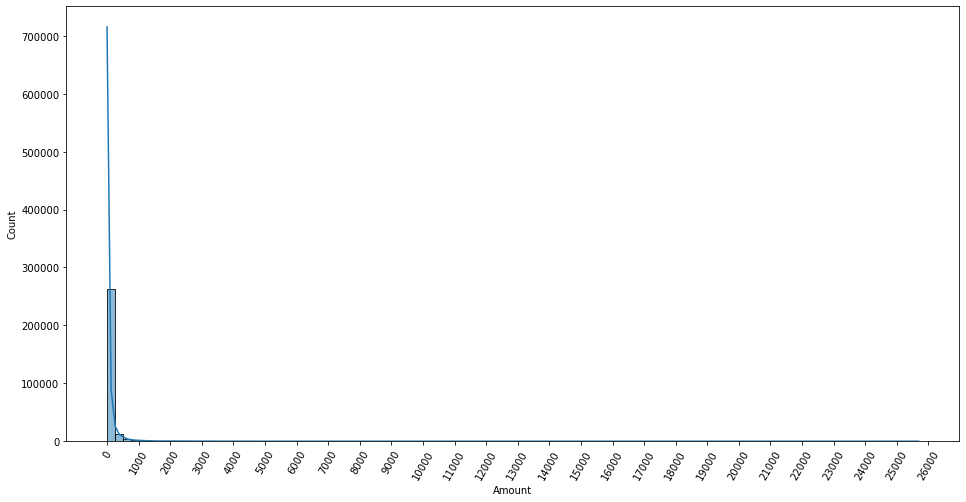

In [13]:
import seaborn as sns
## Amount 컬럼 분포 확인 -> 매우 불균형하다.
plt.figure(figsize=(16, 8))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

#### Amount 컬럼 Scale 변환

**데이터 사전 가공을 위한 별도의 함수에 StandardScaler를 이용하여 Amount 피처 변환**

In [14]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [15]:
sys.path.append('..')
from modules.jupyter_lib import display_dfs

bf_card_df = card_df.iloc[:,-2:].head(3)
af_card_df = get_preprocessed_df(card_df).iloc[:,[0,-1]].head(3)

dfs={'Before SS':bf_card_df, "After SS":af_card_df}
display_dfs(dfs, justify='flex-start')

,Amount,Class
0,149.62,0
1,2.69,0
2,378.66,0
,Amount_Scaled,Class
0,0.244964,0
1,-0.342475,0
2,1.160686,0


**StandardScaler 변환 후 로지스틱 회귀 및 LightGBM 학습/예측/평가**

In [69]:
## inspect로 get_train_test_dataset 함수 소스 확인
import inspect
print(*inspect.getsource(get_train_test_dataset).split('\n')[:3],sep='\n')

def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df) # Time 컬럼 드랍


In [16]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.9779


#### Log 변환
: Log 변환은 왜곡된 분포도를 가진 데이터 세트를 비교적 정규 분포에 가깝게 변환해주는 훌륭한 Feature Engineering 방식
-> 불균형하다면 로그변환하는게 좋다.
<img src=https://blog.kakaocdn.net/dn/ctVN9H/btrCPGKkfJd/HGA8KA6fNhb2J2L5cbWGek/img.png width=1200>

##### log1p 사용하는 이유

    Log(0)은 -inf이기 때문에 0이상의 분포를 갖는 값에 대해서 -inf라는 이상치가 나올 수 있다.
    -> log1p를 사용하면 0일때 기존 log(1)값인 0값이 나오게하여 이상치가 생기지않게 값을 로그스케일로 변환할 수 있다.
**log1p <-> expm1 상호변환**

In [18]:
print(np.log(1e-1000))

-inf


In [75]:
# log1p 와 expm1 설명 
import numpy as np
print(f"0에 무수히 가까운수는 0과 같다 -> {1e-1000 == 0.0}")
print(f"0에 무수히 가까운수를 로그화하면: {np.log(1e-1000)}")
## log(0+1)과 log1p(0)은 같다.
print(np.log(1e-1000 + 1))
print(np.log1p(1e-1000))

0에 무수히 가까운수는 0과 같다 -> True
0에 무수히 가까운수를 로그화하면: -inf
0.0
0.0


In [77]:
var_1 = np.log1p(100)
var_2 = np.expm1(var_1)
print(var_1, var_2)

4.61512051684126 100.00000000000003


**Amount를 로그 변환**

In [78]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

**log1p 변환 후 로지스틱 회귀 및 LightGBM 학습/예측/평가**

In [21]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796


**log1p 변환 후, 분포 확인: 어느정도 정규분포처럼 변환되었다.**

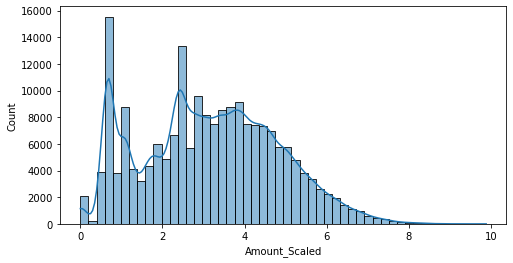

In [22]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(X_train['Amount_Scaled'], bins=50, kde=True)
plt.show()

### 이상치 데이터 제거 후 모델 학습/예측/평가

**각 피처들의 상관 관계를 시각화. 결정 레이블인 class 값과 가장 상관도가 높은 피처 추출 -> V14**

(31, 31)


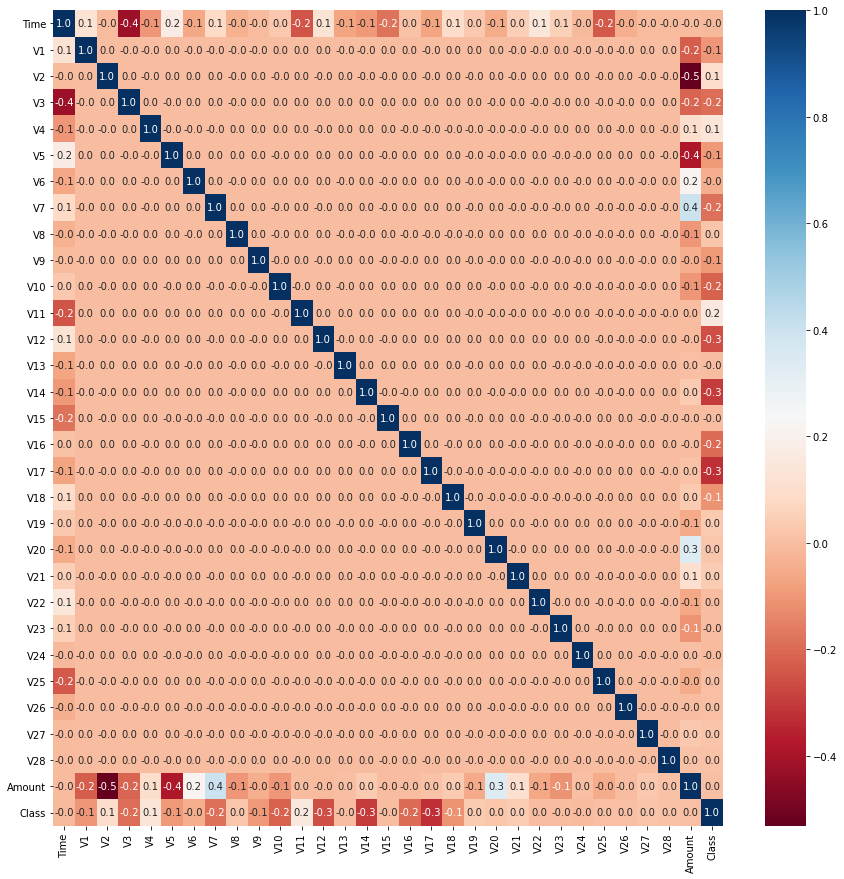

In [79]:
import seaborn as sns

plt.figure(figsize=(15, 15))
corr = card_df.corr()
print(corr.shape)
sns.heatmap(corr, annot=True, fmt='.1f',  cmap='RdBu')
plt.show()

#### IQR 
    V14 피처에 적용
<img src=https://blog.kakaocdn.net/dn/XeVRk/btrCQ6Iqirc/AMLGwLUg9zXstO1ISSNmxk/img.png width=1200>

IQR(Inter Quantile Range) : 박스의 범위로 1/4 분위 부터 3/4분위를 의미한다.
* Quantile : 4분위로 데이터 지정 

IQR 이상치 제거 : IQR에 따른 최대, 최소값 밖에 있는 값들을 이상치로 판명하는 방법
- 최대값: 3/4 분위수에서 1.5 * IQR값을 더한 지점
- 최소값: 1/4 분위수에서 1.5 * IQR값을 뺀 지점

**Dataframe에서 outlier에 해당하는 데이터를 필터링하기 위한 함수 생성. outlier 레코드의 index를 반환함**

In [25]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column] # 이상치를 사기거래에 대해서만 찾기
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [26]:
np.percentile(card_df['V14'].values, 75)

0.493149849218149

In [27]:
np.percentile(card_df['V14'].values, 100)
np.max(card_df['V14'].values)
quantile_25 = np.percentile(card_df['V14'].values, 25)
quantile_75 = np.percentile(card_df['V14'].values, 75)
print(quantile_25, quantile_75)

-0.4255740124549935 0.493149849218149


In [28]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


**로그 변환 후 V14 피처의 이상치 데이터를 삭제한 뒤 모델들을 재 학습/예측/평가**

In [29]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9780


### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

#### 언더 샘플링과 오버 샘플링
- 언더 샘플링: 많은 레이블을 가진 데이터 세트를 적은 레이블을 가진 데이터 세트로 감소 샘플링
- 오버 샘플링: 적은 레이블을 가진 데이터 세트를 많은 레이블을 가진 데이터 세트로 증가 샘플링
<img src=https://blog.kakaocdn.net/dn/b8CjL4/btrCS0gX4FG/fHzOJT4cNFDDFf3TUEk300/img.png width=1200>

In [80]:
import imblearn
print(imblearn.__version__)

0.9.1


In [33]:
y_train.value_counts()

0    199020
1       342
Name: Class, dtype: int64

#### SMOTE 오버샘플링 방법
- 네모: 사기데이터
- 동그라미: 정상 데이터

-> 사기데이터 기준으로 KNN을 해서, 그 값들 사이에 랜덤하게 사기 데이터를 증식을 한다. 

<img src=https://blog.kakaocdn.net/dn/ckGmWb/btrCKV3gsAl/4j4C9TabZIkp5U5jNjZx40/img.png width=1200>
학습이나 검증은 오버샘플링해서 할 수 있는데, 테스트데이터는 절대 오버샘플링 시키면안된다.

In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print(f'SMOTE 적용 후 레이블 값 분포: \n{pd.Series(y_train_over).value_counts()}')

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199364, 29) (199364,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
0    199020
1    199020
Name: Class, dtype: int64


In [35]:
lr_clf = LogisticRegression(max_iter=1000)
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)


오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9737


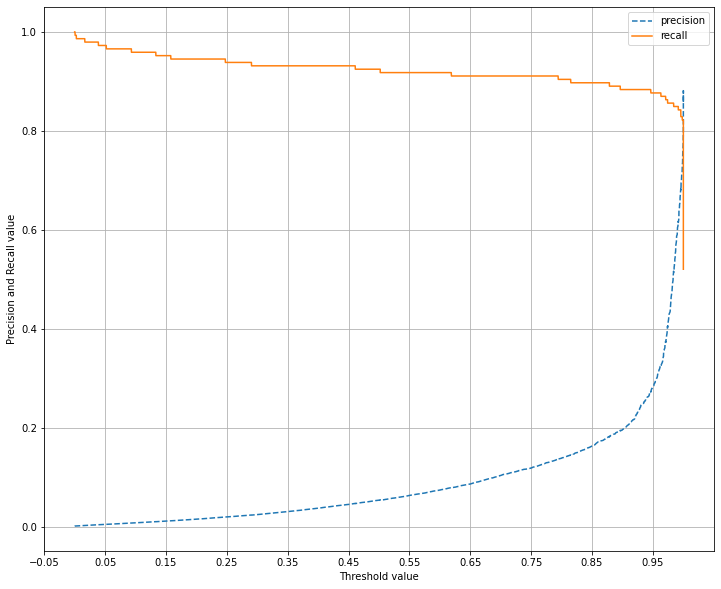

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(12,10))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    


precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [45]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493,    F1: 0.8794, AUC:0.9814
